In [1]:
# lib manipulasi data
import pandas as pd
import numpy as np

# lib untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

# lib praproses data
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

1. Data Collections

In [2]:
# load dataset
dataset = pd.read_csv("dataset/dataset_enso.csv", parse_dates=["acq_date"])

In [3]:
# set index Date
dataset = dataset.set_index("acq_date")

In [4]:
# show dataset
dataset.tail()

,hotspot,sst_std,sst_anom,oni_std,oni_anom,soi_std,soi_anom
acq_date,,,,,,,
2023-08-31,186,28.20,1.30,28.28,1.32,-0.8,-1.4
2023-09-30,2247,28.29,1.53,28.32,1.56,-1.3,-2.1
2023-10-31,3200,28.36,1.59,28.49,1.78,-0.5,-0.8
2023-11-30,390,28.72,1.90,28.60,1.92,-0.8,-1.3
2023-12-31,42,28.64,1.99,28.59,1.97,-0.2,-0.4


In [5]:
def lineplot(x, y, label, color):
  
  # membuat time series plot
  fig, ax = plt.subplots(figsize=(8,4))
  ax.plot(x, y, color="tab:"+str(color), label=label, linewidth=2)

  # membuat label-label
  ax.set_title("", fontsize=14)
  ax.set_xlabel("", fontsize=12)
  ax.set_ylabel("", fontsize=12)
  ax.legend(loc='upper left')
  ax.grid(True)

  # menampilkan plot
  plt.show()

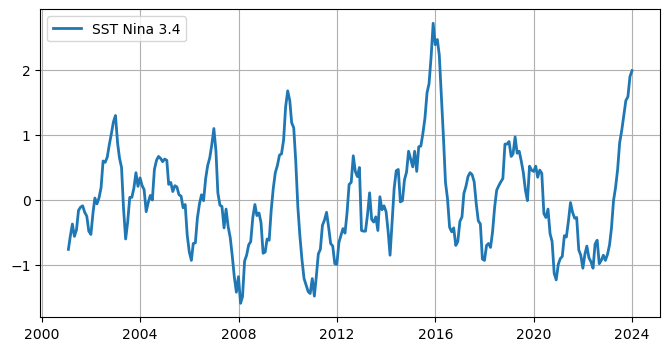

In [6]:
lineplot(dataset.index, dataset["sst_anom"], "SST Nina 3.4", "blue")

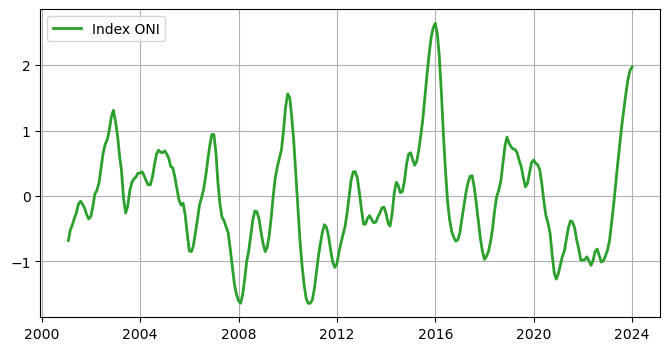

In [7]:
lineplot(dataset.index, dataset["oni_anom"], "Index ONI", "green")

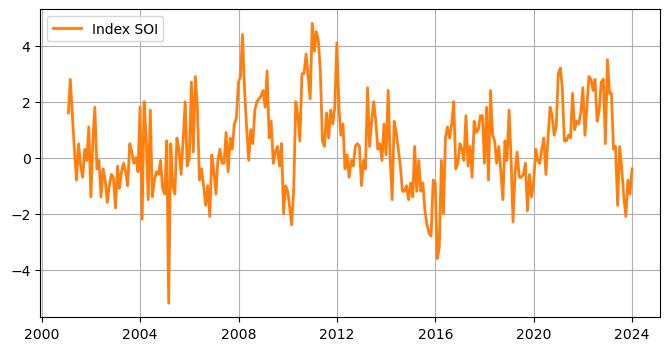

In [8]:
lineplot(dataset.index, dataset["soi_anom"], "Index SOI", "orange")

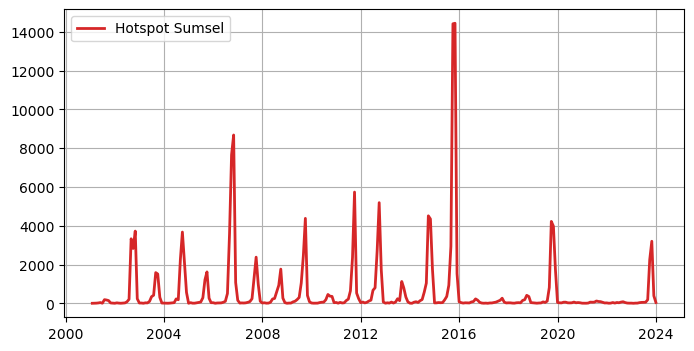

In [9]:
lineplot(dataset.index, dataset["hotspot"], "Hotspot Sumsel", "red")

2. Data Preprocessing

In [10]:
# choose features
data = dataset.filter(["acq_date", "sst_anom", "oni_anom", "soi_anom", "hotspot"]).values

In [11]:
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(np.array(data))

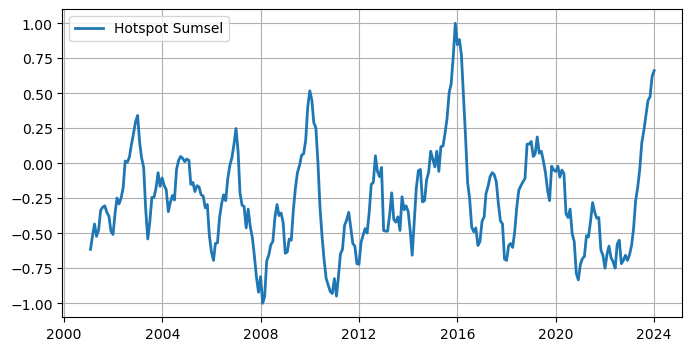

In [12]:
lineplot(dataset.index, scaled[:,0:1], "Hotspot Sumsel", "blue")

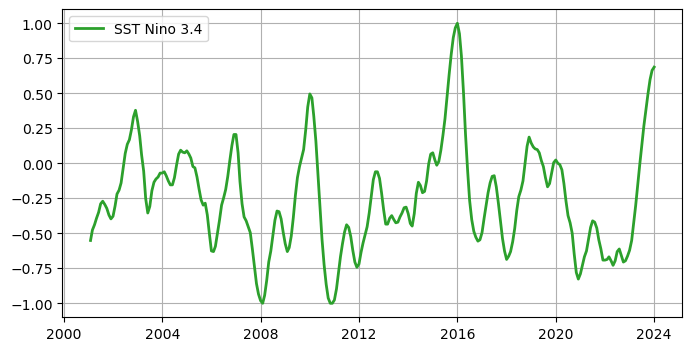

In [13]:
lineplot(dataset.index, scaled[:,1:2], "SST Nino 3.4", "green")

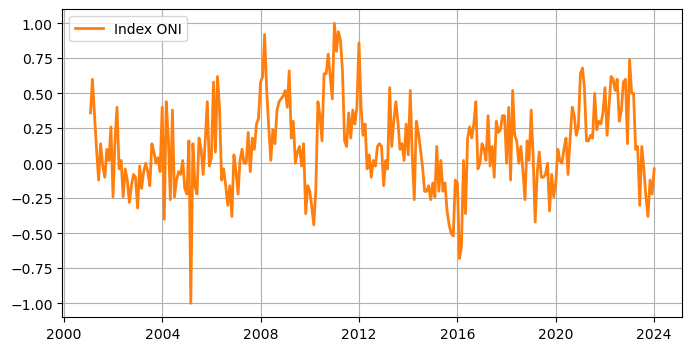

In [14]:
lineplot(dataset.index, scaled[:,2:3], "Index ONI", "orange")

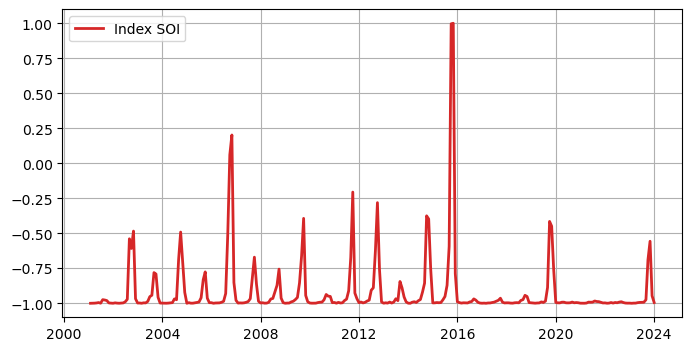

In [15]:
lineplot(dataset.index, scaled[:,3:4], "Index SOI", "red")

3. Results of Preprocessing

In [16]:
acq_date = pd.DataFrame(dataset.index.values, columns=["acq_date"])
scaled = pd.DataFrame(scaled, columns=["sst_anom", "oni_anom", "soi_anom", "hotspot"])

In [17]:
df_normalized = pd.concat([acq_date,scaled], axis=1)

In [18]:
print(np.round(
  df_normalized, 4
))

      acq_date  sst_anom  oni_anom  soi_anom  hotspot
0   2001-01-31   -0.6148   -0.5514      0.36  -1.0000
1   2001-02-28   -0.5220   -0.4766      0.60  -0.9997
2   2001-03-31   -0.4339   -0.4393      0.34  -0.9990
3   2001-04-30   -0.5220   -0.3925      0.10  -0.9976
4   2001-05-31   -0.4756   -0.3505     -0.12  -0.9950
..         ...       ...       ...       ...      ...
271 2023-08-31    0.3411    0.3832     -0.24  -0.9746
272 2023-09-30    0.4478    0.4953     -0.38  -0.6891
273 2023-10-31    0.4756    0.5981     -0.12  -0.5570
274 2023-11-30    0.6195    0.6636     -0.22  -0.9464
275 2023-12-31    0.6613    0.6869     -0.04  -0.9946

[276 rows x 5 columns]


4. Splitting Data

In [19]:
# split data train and test
train_data, test_data = train_test_split(df_normalized, train_size=0.80, test_size=0.20, shuffle=False)

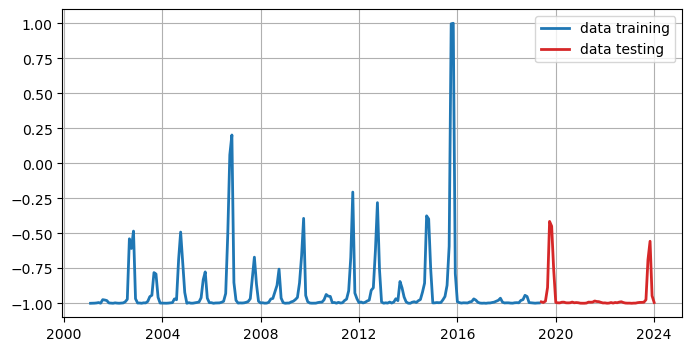

In [20]:
# create figure
fig, ax = plt.subplots(figsize = (8,4))

# create time series plot
ax.plot(
  df_normalized["acq_date"].iloc[0:len(train_data)],
  train_data["hotspot"], 
  color="tab:blue", label="data training", linewidth=2
)
ax.plot(
  df_normalized["acq_date"].iloc[len(train_data):],
  test_data["hotspot"],
  color="tab:red", label="data testing", linewidth=2
)

# set labels
ax.set_title("",fontsize=14)
ax.set_xlabel("",fontsize=12)
ax.set_ylabel("",fontsize=12)
ax.legend(loc="best")
ax.grid(True)

# show plot
plt.show()
